# Week 10: Similarity <font size="1">Rev.: 20181116a</font>

Instructions: Run this code by opening a python command prompt and type "jupyter notebook" and navigate to the folder containing the ipynb file and open it. If you prefer running Python outside the notebook environment, you can extract the code from within Jupyter using File->Download as -> Python

This notebook provides a demo of how to compute similarity among different music tracks. The features are already extracted using SonicVisualizer.


____
## Step 0: Let's define the music tracks in our collection and extract the chroma features

Look in the folder called "collection" and identify the 10 tracks prefixed with "track\_[index]\_[genre]_"

**Question:** Listen to the tracks (first 10-20s sec) and describe the similarity between a few of them. E.g. track_0 and track_5 . Is this easy to do ?

____
## Step 1: Let's load the Python libraries we need

In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from numpy import genfromtxt

## These are few variables related to the layout of the figures
myleft  = 0.125  # the left side of the subplots of the figure
myright = 0.9    # the right side of the subplots of the figure
mybottom = 0.1   # the bottom of the subplots of the figure
mytop = 0.9      # the top of the subplots of the figure
mywspace = 0.2   # the amount of width reserved for space between subplots,
                 # expressed as a fraction of the average axis width
myhspace = 0.5   # the amount of height reserved for space between subplots,
                 # expressed as a fraction of the average axis height

____
## Step 2: Let's load the features from SonicVisualizer 

In [2]:
my_data = dict()
for i_track in range(0,10):
    fn = "./collection/track_" + str(i_track) + "_chroma.csv"
    print(fn)
    my_data[i_track] = genfromtxt(fn, delimiter=',')


./collection/track_0_chroma.csv
./collection/track_1_chroma.csv
./collection/track_2_chroma.csv
./collection/track_3_chroma.csv
./collection/track_4_chroma.csv
./collection/track_5_chroma.csv
./collection/track_6_chroma.csv
./collection/track_7_chroma.csv
./collection/track_8_chroma.csv
./collection/track_9_chroma.csv


-------
## Step 3: Inspect the data

### Step 3.0: Plot the features for one track

We can pick out one of the tracks and plot the feature matrix

Text(0.5,0,'Frame number (time)')

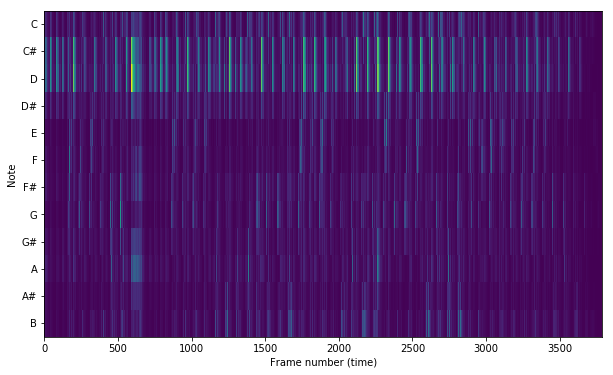

In [3]:
track_index = 0 # Let's look at track 0

track_chroma = my_data[track_index] # Extract teh chroma features for track_index

fig, axes = plt.subplots(1, 1,sharey='row',figsize=(10, 6))
axes.imshow(track_chroma.T, aspect='auto')
axes.set_yticks((range(0,12)))
axes.yaxis.set_ticklabels(('C','C#','D','D#','E','F','F#','G','G#','A','A#','B'))  # let's not show the y axis
axes.set_ylabel("Note")
axes.set_xlabel("Frame number (time)")


We can also just look at one collum i.e. the the "notes" present at a specific point in time

Text(0.5,0,'Note')

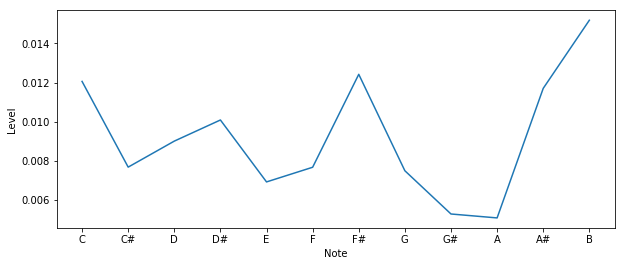

In [4]:
t_index = 456 # let's look at the chroma features at time point 456

fig, axes = plt.subplots(1, 1,sharey='row',figsize=(10, 4))
axes.plot(track_chroma[t_index,:])
axes.set_xticks((range(0,12)))
axes.xaxis.set_ticklabels(('C','C#','D','D#','E','F','F#','G','G#','A','A#','B'))  # let's not show the y axis
axes.set_ylabel("Level")
axes.set_xlabel("Note")

**Question/note**, it is important that you understand this plot so ask the tutor if you're in doubt (as a group). E.g. try to explain to the tutor what this plot shows.

____
### Step 3.1: Plot the features for all the 10 tracks

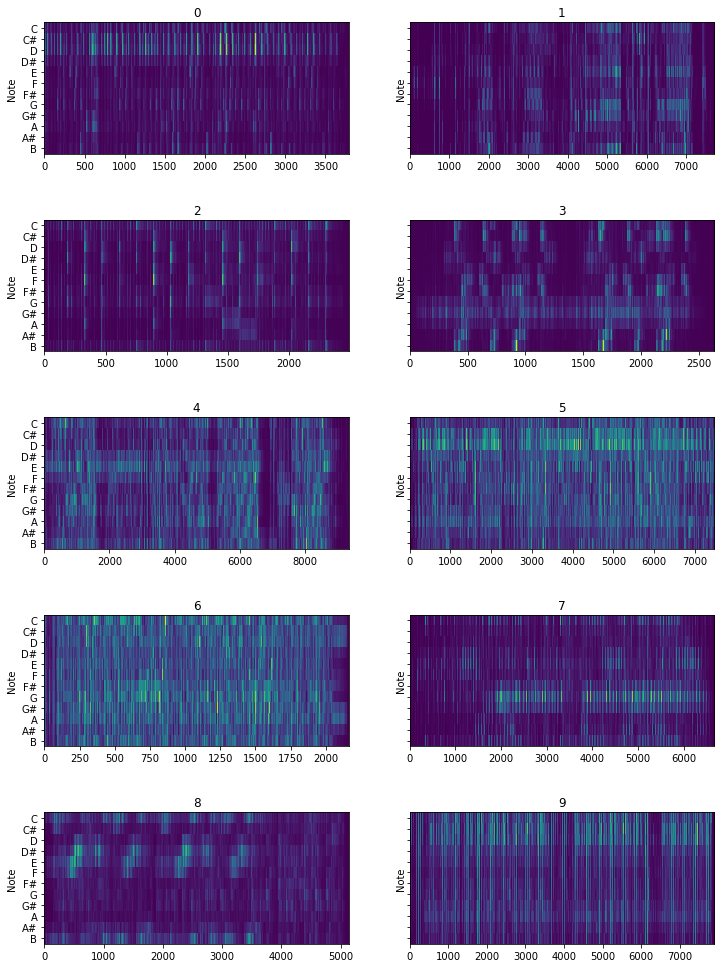

In [5]:
fig, axes = plt.subplots(5, 2,sharey='row',figsize=(12, 16))
for i in range(0,5): 
    for j in range(0,2):         
        track_index = i*2+j
        track_chroma = my_data[track_index]        
        axes[i,j].imshow(track_chroma.T, aspect='auto')
        axes[i,j].set_yticks((range(0,12)))        
        axes[i,j].yaxis.set_ticklabels(('C','C#','D','D#','E','F','F#','G','G#','A','A#','B'))  # let's not show the y axis
        axes[i,j].set_title(str(track_index))
        axes[i,j].set_ylabel("Note")        
                
plt.subplots_adjust(myleft, mybottom, myright, mytop, mywspace, myhspace)

-----

**Questions**: Now, consider the plots above... 
- Are all the tables the same size (i.e. same number of collums) ? If so, this would imply that all the tracks have the same length...

- From the plots, are there any noticeable patterns (perhaps listen to the tracks as well)?

- Can you - by looking at the plots - say which track you think are similar and which are dissimilar?

----
## Step 5: Summarising audio features across time...

The plots in Step 4 provide a very detailed insight into the features over time but can be challenging to cope with when comparing different tracks.
    
A more manageable summary is provided by a histograms visualization which we investigated last week (week 9 individual), or we can think of even simpler ways to summarise the features.


### Step 5.0: Mean representation for one track

A simple but often used way to summarise a track is simply to take the average over the feature table/matrix over time: For each note (e.g. A) simply compute the average for all the timesteps; do this for all notes. This results in 12 values (formally a vector) for each track holding the mean values. Let's try that for track 0...

In [6]:
track_index = 0 # Let's look at track 4
mean_track_chroma = np.mean(my_data[track_index],axis=0) # Extract the MEAN chroma features for track_index

In [7]:
np.shape(mean_track_chroma)

(12,)

Okay, we now have a simpler representation for a track (12 numbers in a vector). Let's try to plot them

Text(0.5,0,'Note')

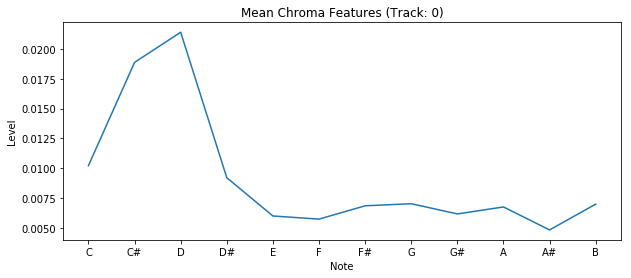

In [8]:
fig, axes = plt.subplots(1, 1,sharey='row',figsize=(10, 4))
axes.plot(mean_track_chroma)
axes.set_title("Mean Chroma Features (Track: " + str(track_index) +")")
axes.set_xticks((range(0,12)))
axes.xaxis.set_ticklabels(('C','C#','D','D#','E','F','F#','G','G#','A','A#','B'))  # let's not show the y axis
axes.set_ylabel("Level")
axes.set_xlabel("Note")

In [9]:
mean_track_chroma = np.empty((12,10))

for i in range(0,5): 
    for j in range(0,2):         
        track_index = i*2+j
        mean_track_chroma[:,track_index] = np.mean(my_data[track_index],axis=0)

-------------
### Step 5.1 Mean representation for all tracks

In [10]:
for i in range(0,5): 
    for j in range(0,2):         
        track_index = i*2+j
        mean_track_chroma[:,track_index] = np.mean(my_data[track_index],axis=0) # save in a 12 x 10 table       

## let normalise the values (a technical things for now)
mm = np.max(np.abs(mean_track_chroma),axis=-1)
mean_track_chroma= mean_track_chroma / mm[:,np.newaxis]


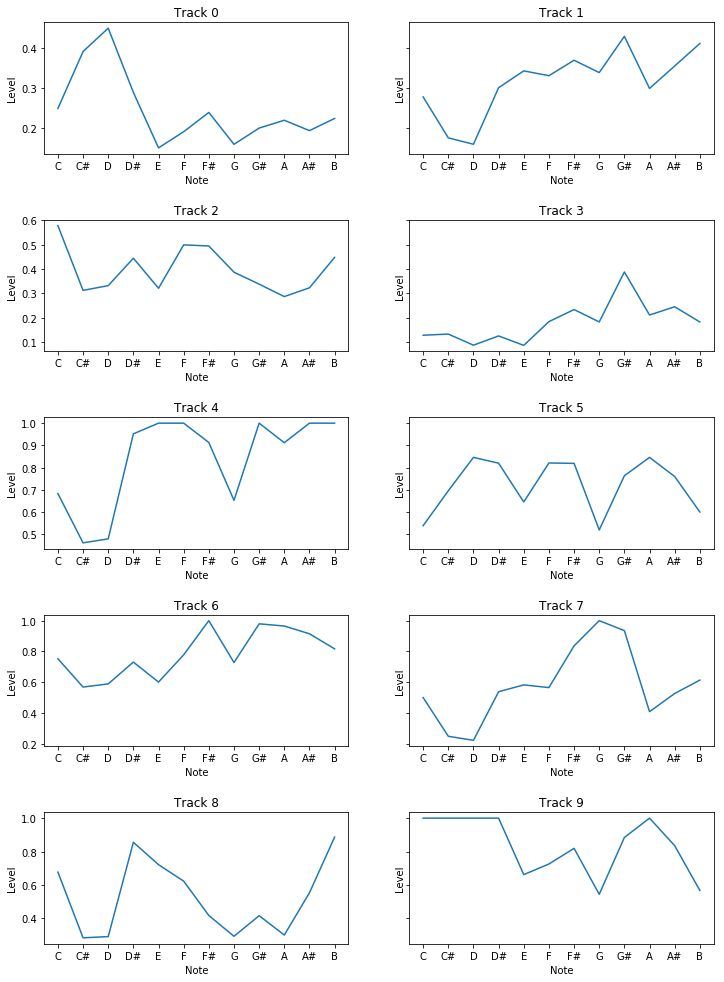

In [11]:
fig, axes = plt.subplots(5, 2,sharey='row',figsize=(12, 16))
for i in range(0,5): 
    for j in range(0,2):         
        track_index = i*2+j
        axes[i,j].plot(mean_track_chroma[:,track_index])
        axes[i,j].set_title("Mean Chroma Features")
        axes[i,j].set_xticks((range(0,12)))
        axes[i,j].xaxis.set_ticklabels(('C','C#','D','D#','E','F','F#','G','G#','A','A#','B'))  # let's not show the y axis
        axes[i,j].set_title("Track " + str(track_index))
        axes[i,j].set_ylabel("Level")
        axes[i,j].set_xlabel("Note")        
        
plt.subplots_adjust(myleft, mybottom, myright, mytop, mywspace, myhspace)

** Note/Question**: We can think of theses averages as the note profile for. i.e. on average which notes are being used more or less in a track. 

- Is it easier to descibe the different between tracks with this representation of the features ?

____
## Step 6: Automatically compute the similarity between tracks

### Step 6.1 Visualizing the tracks in 2D... and computing distance

Let's extractt only the two of the rows in the table with mean chroma features: the level of A and C's in each track

In [12]:
mean_track_chroma_2d = mean_track_chroma[(1,4),:]

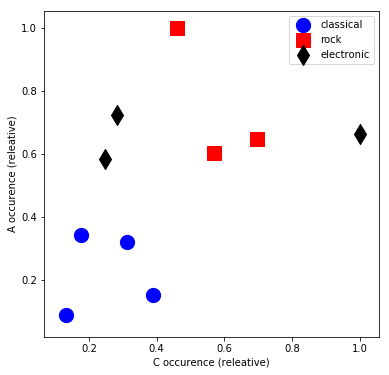

In [14]:
plt.figure(figsize=(6,6))

# Plot classical
plt.scatter(mean_track_chroma_2d[0,0:4], mean_track_chroma_2d[1,0:4], c='blue', alpha=1, marker='o',s=202,label='classical')

#Plot rock
plt.scatter(mean_track_chroma_2d[0,4:7], mean_track_chroma_2d[1,4:7], c='red', alpha=1, marker='s',s=202,label='rock')

#Plot electronic
plt.scatter(mean_track_chroma_2d[0,7:10], mean_track_chroma_2d[1,7:10], c='black', alpha=1, marker='d',s=202,label='electronic')

plt.xlabel("C occurence (releative)")
plt.ylabel("A occurence (releative)")
plt.legend()

**Questions/notes**: 
The plot shows the 10 individual plots in a 2D space

- Can you think of a way to measure distance between individual plots ...?


### Distance between tracks
We will measure the distance usign a Euclidian distance (this is probably the way you though of as well :-) ) , i.e. https://en.wikipedia.org/wiki/Euclidean_distance

Let's first define a function that can compute the distance between two vectors (feel free to ignore this)

In [15]:
# note this is a very naive way of computing teh distacne but include so you can see what's going on
def euclideanDistance(x1, x2): 
    suma = 0
    for i in range(len(x1)):
        suma += np.power(x1[i] - x2[i], 2)
    return np.sqrt(suma)
 

Now compute the distance between all our 10 tracks and save the distances in a 10x10 table/matrix

In [16]:
dist = np.empty((10,10))
for i in range(0,10):
    for j in range(0,10):
        dist[i,j] = euclideanDistance(mean_track_chroma_2d[:,i], mean_track_chroma_2d[:,j])    

In [17]:
np.shape(dist)

(10, 10)

We can visualize the distances  in a heat map by plotting it as an image...

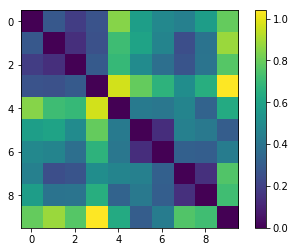

In [18]:
im = plt.imshow(dist,interpolation='none')
plt.colorbar(im)

**Questions/notes **
- If I want something similar to track_10 which track would you recommend based on the computed similarity ?
- Can you identify some structure in the distance matrix which reflects the nature of the tracks we are considering?

----
### Step 6.2 Using all 12 notes to compute similarity

Generalising the 2D example above (only A and C notes) to 12D is a bit difficult as most people as it hard to imagine a 12 dimentional space and we can't easily visualize it. This, however, does not mean that we can not computate distances, as in the 2D case...

In [19]:
dist_12D = np.empty((10,10))
for i in range(0,10):
    for j in range(0,10):
        dist_12D[i,j] = euclideanDistance(mean_track_chroma[:,i], mean_track_chroma[:,j])    

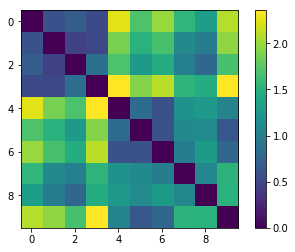

In [20]:
im = plt.imshow(dist_12D,interpolation='none')
plt.colorbar(im)

** Questions/notes **
- What has changed - are the distances the same as above, is the stucture more clear (why / why not) ?
